In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [104]:
data = pd.read_csv("tips.csv")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [106]:
data.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [107]:
l_e = preprocessing.LabelEncoder()
data['sex'] = l_e.fit_transform(data['sex'])
data
    


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,No,Sat,Dinner,3
240,27.18,2.00,0,Yes,Sat,Dinner,2
241,22.67,2.00,1,Yes,Sat,Dinner,2
242,17.82,1.75,1,No,Sat,Dinner,2


In [108]:
l_e = preprocessing.LabelEncoder()
data_lists = ["smoker", "day", "time"]
for lists in data_lists:
    data[lists] = l_e.fit_transform(data[lists])
data


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    int32  
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
dtypes: float64(2), int32(4), int64(1)
memory usage: 9.7 KB


In [110]:
#data = data.drop("sex", axis =1)
#data


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    int32  
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
dtypes: float64(2), int32(4), int64(1)
memory usage: 9.7 KB


1    157
0     87
Name: sex, dtype: int64

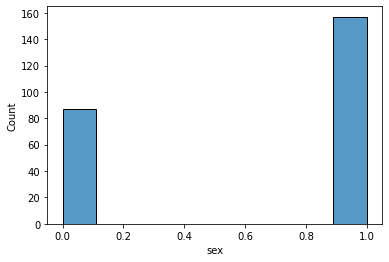

In [112]:
sns.histplot(data=data, x="sex")
data["sex"].value_counts()

<AxesSubplot:xlabel='day', ylabel='smoker'>

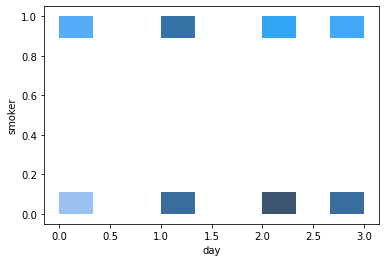

In [113]:
sns.histplot(data=data, y="smoker",x="day")

<AxesSubplot:xlabel='sex', ylabel='smoker'>

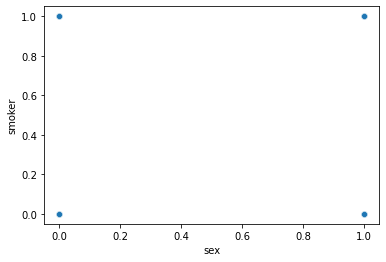

In [114]:
sns.scatterplot(data=data, y="smoker",x="sex")

<AxesSubplot:xlabel='sex', ylabel='smoker'>

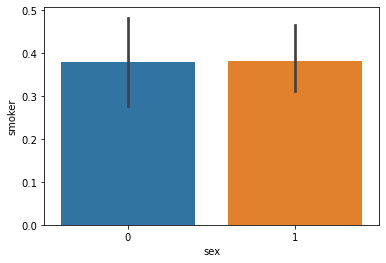

In [115]:
sns.barplot(data=data, y="smoker",x="sex")

<AxesSubplot:xlabel='sex', ylabel='time'>

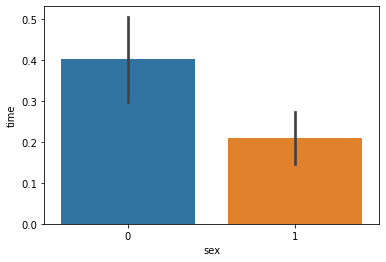

In [116]:
sns.barplot(data=data, y="time",x="sex")

In [131]:
data[["smoker","sex"]].value_counts()

smoker  sex
0       1      97
1       1      60
0       0      54
1       0      33
dtype: int64

In [132]:
data[["smoker","day"]].value_counts()

smoker  day
0       2      57
        1      45
        3      45
1       1      42
        2      19
        3      17
        0      15
0       0       4
dtype: int64

In [117]:
x = data.drop("total_bill", axis=1)
y = data["total_bill"]

In [118]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2)

In [119]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(195, 6)
(49, 6)
(195,)
(49,)


In [120]:
lr_ = LinearRegression()

In [121]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [122]:
lr_.fit(x_train, y_train)

LinearRegression()

In [124]:
y_pred = lr_.predict(x_val)

In [125]:
y_pred

array([19.08006999, 27.48153105, 17.71098338, 18.1530926 , 12.33623007,
       18.49945231, 14.91214309, 30.55409726, 19.43163993, 20.54867554,
       26.28946656, 18.49945231, 13.66043556, 16.27274269, 15.88131887,
       22.17761699, 19.70445563, 22.91378245, 15.97292281, 36.522362  ,
       13.99562552, 26.1271125 , 19.34098949, 21.57559209, 13.21821517,
       11.47060293, 19.65536626, 15.59367073, 34.63660598, 19.2623464 ,
       22.97770426, 16.52576922, 24.10316422, 26.64637993, 19.93341423,
       14.40611206, 21.49843387, 29.79578817, 12.39758031, 27.5497096 ,
       35.10919124, 13.10861317, 34.40070791, 22.93102208, 16.61141445,
       11.75335701, 18.78976115, 14.57081063, 16.77345232])

In [127]:
lr_.score(x_val, y_val)

0.21109080458027285